In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score


In [ ]:
# Load the dataset 
iris_df = pd.read_csv('./data/iris.csv')

iris_df.head()

### **Data Preprocessing** ###

In [10]:
# Features and target
X = iris_df.iloc[:, :-1] # All columns except the last (featrues)
y = iris_df.iloc[:, -1] # Last column (target/label)

# Split into train and test sets (80% train, 20% train)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Train Navive Bayes Model** ###

In [18]:
# Inlitialize and train naive bayes classifier
model = GaussianNB()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

In [22]:
# Get confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

print("Confusion Matrix:")
print(pd.DataFrame(cm, index=model.classes_, columns=model.classes_))

# Calculate metrics (assuming binary classification for individual class analysis)
# For multi-class, we compute metrics in a macro/micro/weighted way

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  # average='macro' for multiclass
recall = recall_score(y_test, y_pred, average='macro')
error_rate = 1 - accuracy

print(f"\nAccuracy: {accuracy:.2f}")
print(f"Error Rate: {error_rate:.2f}")
print(f"Precision (macro): {precision:.2f}")
print(f"Recall (macro): {recall:.2f}")


Confusion Matrix:
            setosa  versicolor  virginica
setosa          10           0          0
versicolor       0           9          0
virginica        0           0         11

Accuracy: 1.00
Error Rate: 0.00
Precision (macro): 1.00
Recall (macro): 1.00


For the above we use `average=macro`
- Calculate precision and recall for each class individually
- Then take the average of all the calsses - treating all classes equally

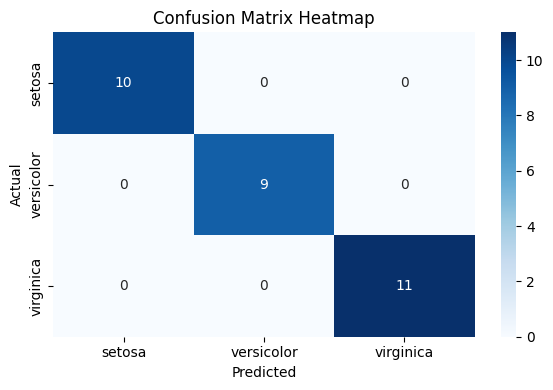

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

From the graph we can say that 
- Diagonal represents the TP
- the other two col represents the FP, FN
  - e.g setosa [10 - TP, 0 - FP, 0 - FN]

- TN is the addition of other two TP
  e. for setosa TN = 9 + 11 = 20


In [38]:
def get_tp_fp_fn_tn(cm, class_index):
    TP = cm[class_index, class_index]
    FP = cm[:, class_index].sum() - TP
    FN = cm[class_index, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)
    return TP, FP, FN, TN

# Example for class index 1 (versicolor)
for i in range(3):
    
    TP, FP, FN, TN = get_tp_fp_fn_tn(cm, class_index=i)
    print(f"\nFor class '{model.classes_[i]}':")
    print(f"TP = {TP}, FP = {FP}, FN = {FN}, TN = {TN}")



For class 'setosa':
TP = 10, FP = 0, FN = 0, TN = 20

For class 'versicolor':
TP = 9, FP = 0, FN = 0, TN = 21

For class 'virginica':
TP = 11, FP = 0, FN = 0, TN = 19
